<a href="https://colab.research.google.com/github/AmanPriyanshu/Reinforcement-Learning/blob/master/RandomPoleCart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym
from matplotlib import pyplot as plt
import time
import math

In [2]:
def main(verbose):
  env = gym.make("CartPole-v0")
  total_reward = 0.0
  total_steps = 0
  obs = env.reset()
  while True:
    action = env.action_space.sample()
    obs, reward, done, _ = env.step(action)
    total_reward += reward
    total_steps += 1
    if done:
      break
  
  return total_reward

In [3]:
rewards = []
for _ in range(100):
  rewards.append(main(verbose=0))

In [4]:
def moving(alpha):
  moving_rewards = []
  pr = rewards[0]
  for r in rewards:
    moving_rewards.append(alpha*r+(1-alpha)*pr)
    pr = alpha*r+(1-alpha)*pr
  return moving_rewards

[]

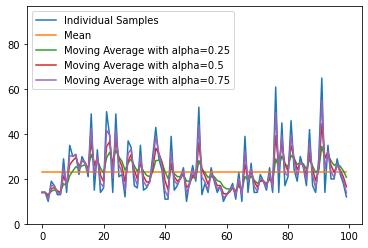

In [5]:
plt.plot([i for i in range(len(rewards))], rewards, label='Individual Samples')
plt.plot([i for i in range(len(rewards))], [sum(rewards)/len(rewards) for _ in range(len(rewards))], label='Mean')
plt.plot([i for i in range(len(rewards))], moving(0.25), label='Moving Average with alpha=0.25')
plt.plot([i for i in range(len(rewards))], moving(0.5), label='Moving Average with alpha=0.5')
plt.plot([i for i in range(len(rewards))], moving(0.75), label='Moving Average with alpha=0.75')
plt.ylim([0, int(max(rewards)*1.5)])
plt.legend(loc='best')
plt.plot()